In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
from branchcut.unwrap import *
from branchcut.setup import find_residues, wrap
from branchcut.branchCut import branch_cut

from matplotlib.colors import ListedColormap
ccmap = plt.get_cmap('RdYlBu',3)
ncmap = ccmap(range(0,3))
ncmap[0] = np.array([1,0,0,1])
ncmap[2] = np.array([0,0,1,1])
ncmap = ListedColormap(ncmap)

In [2]:
DIR = '../data/simulated_data_book'
EXAMPLE = 'ISOLA'
SEED = (40,40)

if EXAMPLE == 'LONGS':
    SHAPE = (458,152)
    FN = 'longs.152x458'
elif EXAMPLE == 'ISOLA':
    SHAPE = (458,157)
    FN = 'isola.157x458'


Text(0.5, 0.98, 'ISOLA')

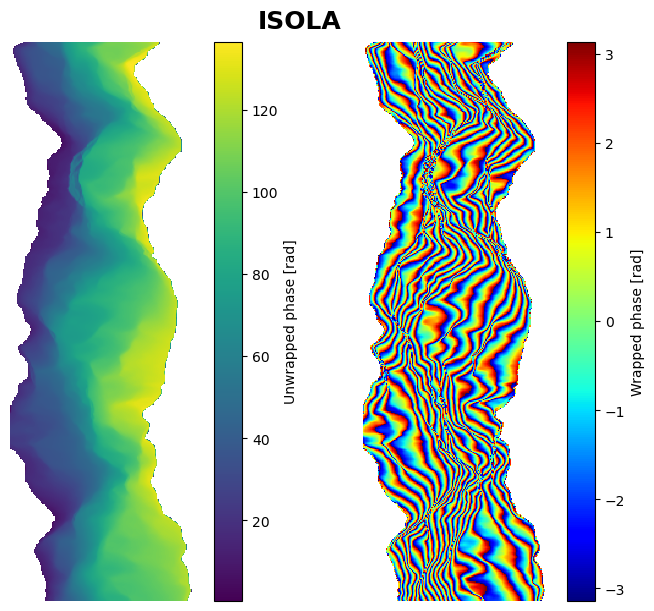

In [3]:
vars = ['mask','phase','surf']
dtypes = ['uint8','int8','>f4']
data = {}
for i,v in enumerate(vars):
    filename =FN+'.'+v
    data[v]=np.fromfile(os.path.join(DIR,filename),dtype=dtypes[i]).reshape(SHAPE)

data['mask'] = data['mask'].astype(bool)
data['phase_file'] = np.pi * (data['phase'] + 128) / 128 - np.pi # wrapped phase in radians
data['phase_file'][~data['mask']] = np.nan
data['surf'][~data['mask']] = np.nan
data['phase'] = wrap(data['surf'])

fig, ax = plt.subplots(1,2, sharey=True, layout='constrained', figsize=(7,6))
im = ax[0].imshow(data['surf'])
ax[0].axis('off')
fig.colorbar(im, label = "Unwrapped phase [rad]")

im = ax[1].imshow(data['phase'],cmap='jet',interpolation='nearest')
ax[1].axis('off')
fig.colorbar(im, label = "Wrapped phase [rad]")

fig.suptitle(EXAMPLE,fontsize = 18,fontweight="bold")

#plt.savefig(EXAMPLE.lower() + '.pdf')

In [4]:
residues = find_residues(data['phase'])
residues[residues<-1] = 0
BranchCuts = branch_cut(residues, mask=data['mask'])
BranchCuts[~data['mask']] = True
phase_unwrapped_BC = unwrap(data['phase'],seed=SEED, branchCuts=BranchCuts, mode='bfs', unwrapBranchPixels=True)

c:\Users\emilt\Documents\Noter\9_RemoteSensing\BranchCut\tests\..\branchcut\setup\setup.py:104: RuntimeWarning: invalid value encountered in cast
  return _np.round(out).astype(int)


Text(0.5, 0.98, 'ISOLA')

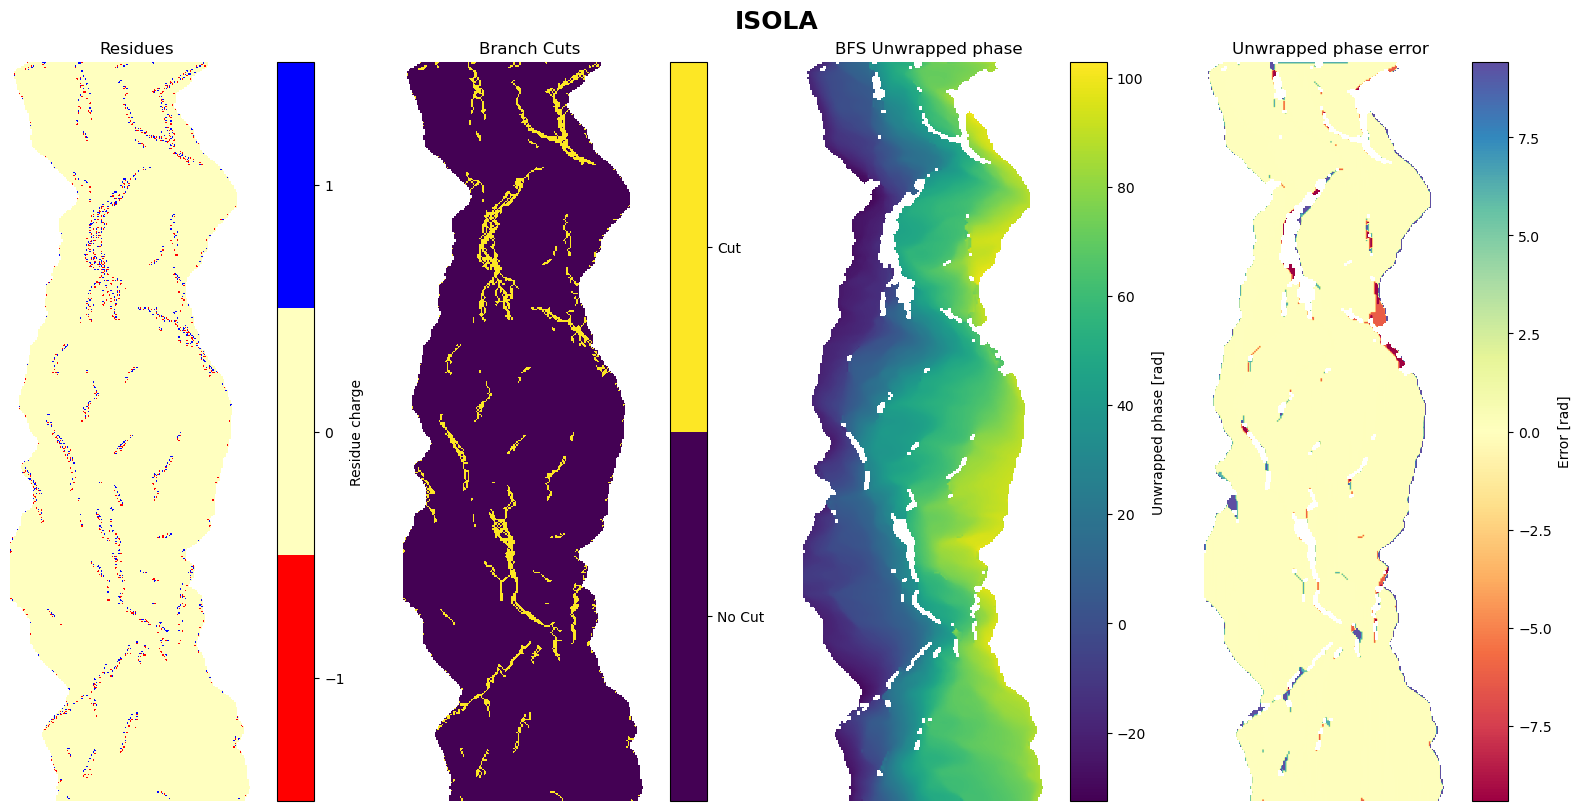

In [5]:
fig, ax = plt.subplots(1,4, sharey=True, layout='constrained', figsize=(16,8))

# Residues
residuesTP = np.copy(residues).astype(float)
residuesTP[~data['mask']] = np.nan
im = ax[0].imshow(residuesTP, vmin=-1.5, vmax=1.5,cmap=ncmap)
ax[0].set_title('Residues')
ax[0].axis('off')
cbar = fig.colorbar(im,label='Residue charge')
cbar.set_ticks([-1,0,1])

# Branch cuts
ccmap = plt.get_cmap('viridis',2)
BranchCutsTP = np.copy(BranchCuts).astype(float)
BranchCutsTP[~data['mask']] = np.nan
im = ax[1].imshow(BranchCutsTP, cmap=ccmap,vmin=-0.5,vmax=1.5)
ax[1].set_title('Branch Cuts')
ax[1].axis('off')
cbar = fig.colorbar(im)
cbar.set_ticks([0,1])
cbar.set_ticklabels(['No Cut','Cut'])

# Unwrapped phase
im = ax[2].imshow(phase_unwrapped_BC)
ax[2].set_title('BFS Unwrapped phase')
ax[2].axis('off')
fig.colorbar(im, label='Unwrapped phase [rad]')

# unwrapped phase error
error = phase_unwrapped_BC  - data['surf']
im = ax[3].imshow(error - np.nanmedian(error), cmap='Spectral', vmin=-3*np.pi,vmax=3*np.pi)
ax[3].set_title('Unwrapped phase error')
fig.colorbar(im, label='Error [rad]')
ax[3].axis('off')
fig.suptitle(EXAMPLE,fontsize = 18,fontweight="bold")

#plt.savefig(EXAMPLE.lower() + 'Results.pdf')

In [6]:
residues = find_residues(data['phase_file'])
residues[residues<-1] = 0
BranchCuts = branch_cut(residues, mask=data['mask'])
BranchCuts[~data['mask']] = True
phase_unwrapped_BC_bfs = unwrap(data['phase_file'],seed=SEED, branchCuts=BranchCuts, mode='bfs', unwrapBranchPixels=True)
phase_unwrapped_BC_dfs = unwrap(data['phase_file'],seed=SEED, branchCuts=BranchCuts, mode='dfs', unwrapBranchPixels=True)


c:\Users\emilt\Documents\Noter\9_RemoteSensing\BranchCut\tests\..\branchcut\setup\setup.py:104: RuntimeWarning: invalid value encountered in cast
  return _np.round(out).astype(int)


Text(0.5, 0.98, 'ISOLA from phase file')

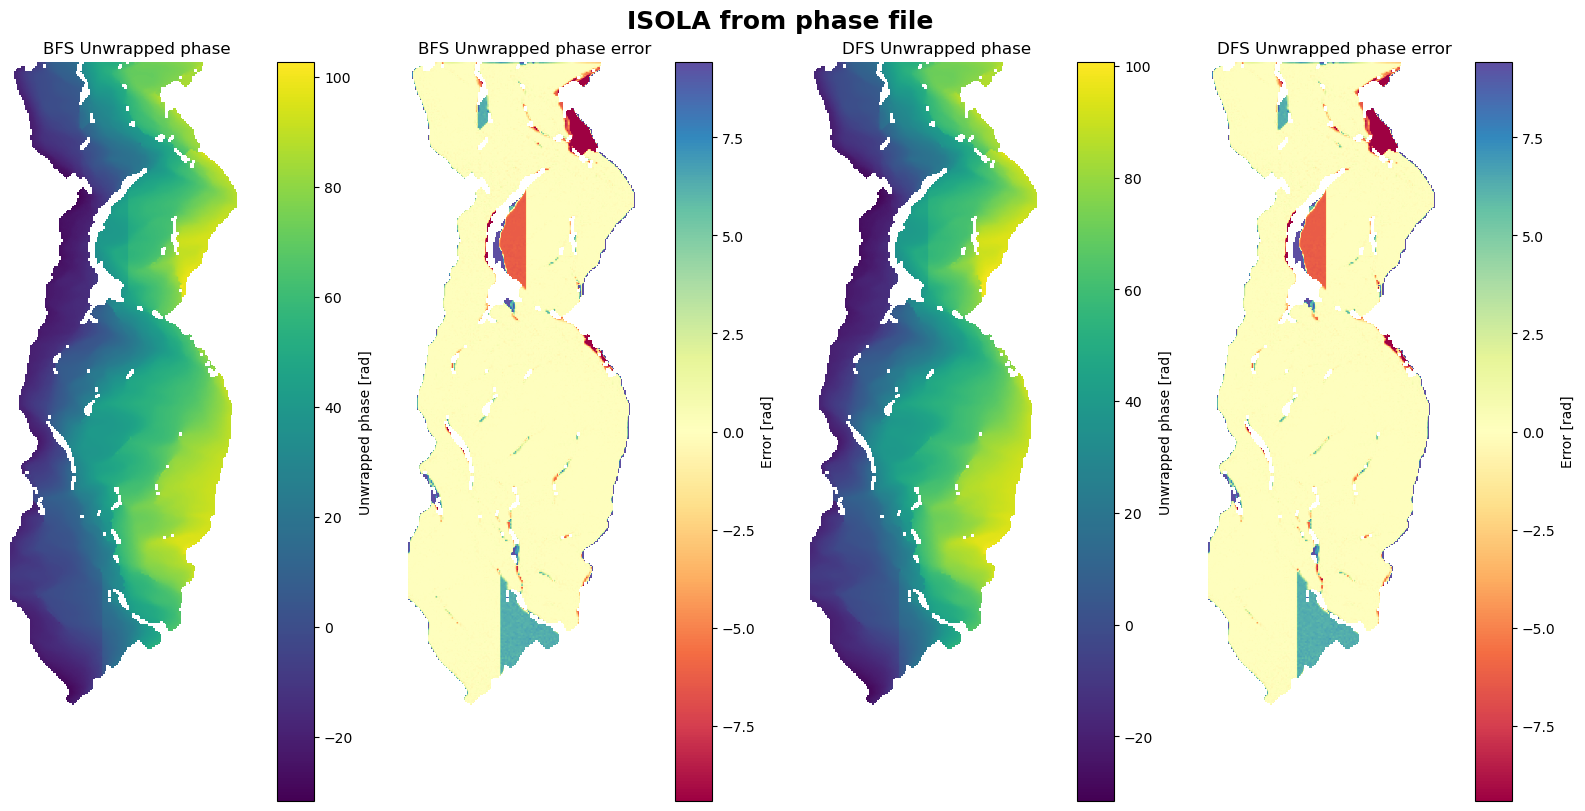

In [7]:

fig, ax = plt.subplots(1,4, sharey=True, layout='constrained', figsize=(16,8))

# Unwrapped phase
im = ax[0].imshow(phase_unwrapped_BC_bfs)
ax[0].set_title('BFS Unwrapped phase')
ax[0].axis('off')
fig.colorbar(im, label='Unwrapped phase [rad]')

# unwrapped phase error
error = phase_unwrapped_BC_bfs  - data['surf']
im = ax[1].imshow(error - np.nanmedian(error), cmap='Spectral', vmin=-3*np.pi,vmax=3*np.pi)
ax[1].set_title('BFS Unwrapped phase error')
fig.colorbar(im, label='Error [rad]')
ax[1].axis('off')
fig.suptitle(EXAMPLE + 'File',fontsize = 18,fontweight="bold")


# Unwrapped phase
im = ax[2].imshow(phase_unwrapped_BC_dfs)
ax[2].set_title('DFS Unwrapped phase')
ax[2].axis('off')
fig.colorbar(im, label='Unwrapped phase [rad]')

# unwrapped phase error
error = phase_unwrapped_BC_dfs  - data['surf']
im = ax[3].imshow(error - np.nanmedian(error), cmap='Spectral', vmin=-3*np.pi,vmax=3*np.pi)
ax[3].set_title('DFS Unwrapped phase error')
fig.colorbar(im, label='Error [rad]')
ax[3].axis('off')
fig.suptitle(EXAMPLE + ' from phase file',fontsize = 18,fontweight="bold")

#plt.savefig(EXAMPLE.lower() + 'Results_phaseFile.pdf')